In [15]:
import pandas as pd
from matplotlib import pyplot
from datetime import datetime
from pandas.plotting import autocorrelation_plot

C:\Users\zariff\AppData\Local\Temp\ipykernel_17108\1729638424.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo_sales.csv', header = 0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


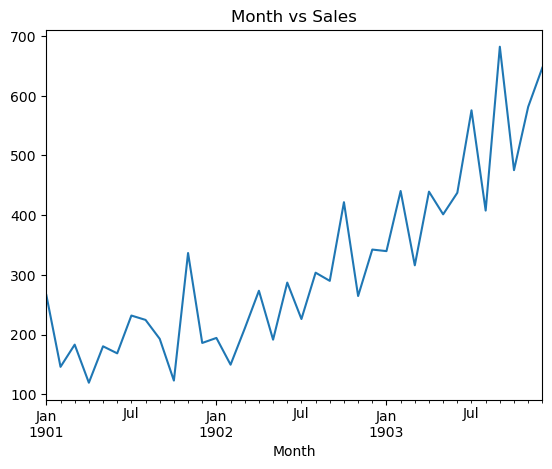

In [13]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo_sales.csv', header = 0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(x = "Month", y = "Sales", title = "Month vs Sales")
pyplot.show()

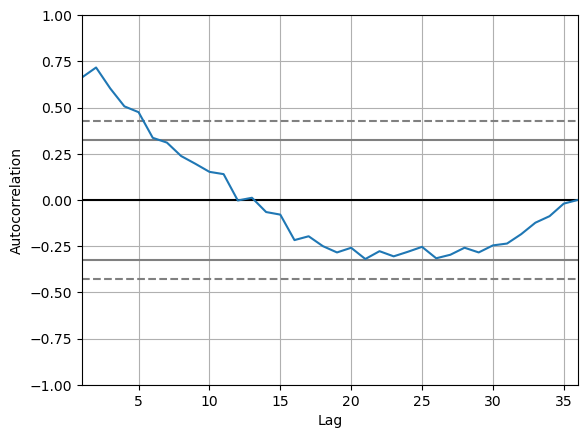

In [16]:
#autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

In [20]:
#ARIMA with Python
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [21]:
series.index = series.index.to_period('M')
#fit model
#lag value of 5 for autoregression
#difference order of 1 to make time series stationary
# moving average of 0
model = ARIMA(series, order = (5, 1, 0))
model_fit = model.fit()
#summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 17 May 2023   AIC                            408.969
Time:                        16:01:50   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

<AxesSubplot:xlabel='Month'>

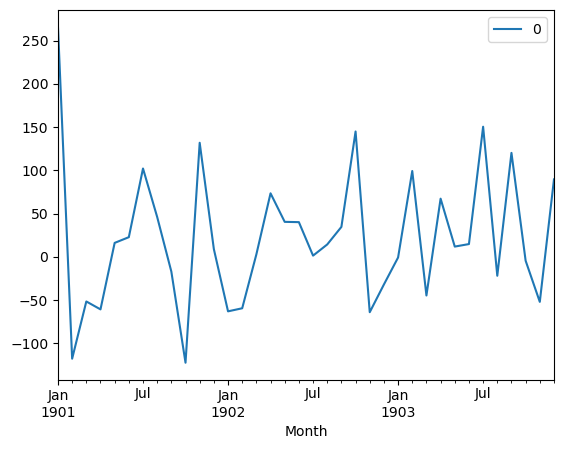

In [24]:
from pandas import DataFrame
#line plot of residuals
#if the residuals are +, data point is above regression line
#if the residuals are -, data point is below regression line
residuals = DataFrame(model_fit.resid)
residuals.plot()

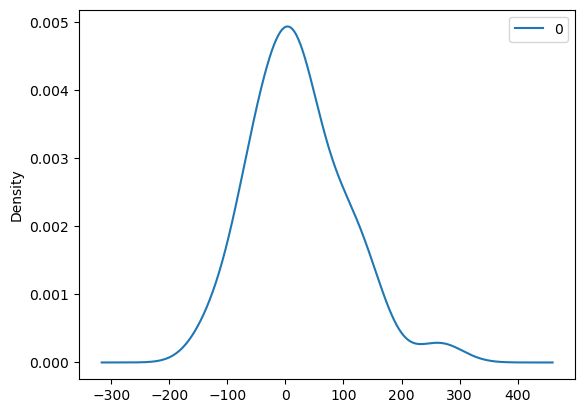

In [25]:
#density plot of residuals
#kde, kernel density estimate
#smoothed estimate of probability density function of
#distribution of residuals
residuals.plot(kind = 'kde')
pyplot.show()

In [26]:
#summary status of residuals
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000
